In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dmf = pd.read_csv("/Users/andreamaldonado/Downloads/benchmark_features_final.csv", index_col=None)
#dmf = dmf.drop(['Unnamed: 0'], axis=1)
print(dmf.shape)
describe = dmf.describe().transpose()
print(describe[describe['max']<1].index[:19].tolist())
selected_ft = ['log', 'ratio_unique_traces_per_trace', 'ratio_most_common_variant', 'ratio_top_1_variants',
               'ratio_top_5_variants', 'ratio_top_10_variants', 'ratio_top_20_variants', 'ratio_top_50_variants',
               'ratio_top_75_variants', 'normalized_variant_entropy', 'normalized_sequence_entropy', 
               'normalized_sequence_entropy_linear_forgetting', 'normalized_sequence_entropy_exponential_forgetting']
selected_ft = dmf.columns[:102]
#print(selected_ft)
ft_preselection = dmf[selected_ft]
#ft_preselection['log'] = dmf['log']
print(ft_preselection.shape)
print(ft_preselection.columns)

ft_preselection
# Include complexity features

(34, 178)
['ratio_unique_traces_per_trace', 'trace_len_hist2', 'trace_len_hist3', 'trace_len_hist4', 'trace_len_hist5', 'trace_len_hist7', 'trace_len_hist8', 'trace_len_hist9', 'ratio_most_common_variant', 'ratio_top_1_variants', 'ratio_top_5_variants', 'ratio_top_10_variants', 'ratio_top_20_variants', 'ratio_top_50_variants', 'ratio_top_75_variants', 'normalized_variant_entropy', 'normalized_sequence_entropy', 'normalized_sequence_eventropy_linear_forgetting', 'normalized_sequence_eventropy_exponential_forgetting']
(34, 102)
Index(['log', 'n_traces', 'n_unique_traces', 'ratio_unique_traces_per_trace',
       'trace_len_min', 'trace_len_max', 'trace_len_mean', 'trace_len_median',
       'trace_len_mode', 'trace_len_std',
       ...
       'eventropy_knn_7', 'Log Nature', 'variant_entropy',
       'normalized_variant_entropy', 'sequence_entropy',
       'normalized_sequence_entropy', 'sequence_eventropy_linear_forgetting',
       'normalized_sequence_eventropy_linear_forgetting',
      

,log,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,eventropy_knn_7,Log Nature,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_eventropy_linear_forgetting,normalized_sequence_eventropy_linear_forgetting,sequence_eventropy_exponential_forgetting,normalized_sequence_eventropy_exponential_forgetting
0,BPIC15_2,832,828,0.995192,1,132,53.310096,54.0,61,19.894977,...,4.721,Real,2.405122e+05,0.627973,2.858769e+05,0.602371,1.505466e+05,0.317217,1.853129e+05,0.390473
1,BPI_Challenge_2018,43809,28457,0.649570,24,2973,57.391541,49.0,49,34.872131,...,7.067,Real,1.156384e+07,0.712079,2.114626e+07,0.570688,1.414023e+07,0.381612,1.557608e+07,0.420362
2,Receipt_WABO_CoSeLoG,1434,116,0.080893,1,25,5.981172,6.0,6,2.166129,...,2.584,Real,2.382326e+03,0.689363,1.829627e+04,0.235532,7.814868e+03,0.100603,1.072870e+04,0.138113
3,BPIC15_3,1409,1349,0.957417,3,124,42.356991,42.0,44,16.138406,...,4.900,Real,2.981464e+05,0.661781,3.975043e+05,0.605676,2.241393e+05,0.341521,2.657571e+05,0.404934
4,BPI_Challenge_2019,251734,11973,0.047562,1,990,6.339720,5.0,5,13.057417,...,6.601,Real,1.690369e+06,0.645530,7.477256e+06,0.328029,7.298458e+06,0.320185,7.300663e+06,0.320282
5,RequestForPayment,6886,89,0.012925,1,20,5.343596,5.0,5,1.467384,...,2.312,Real,1.322840e+03,0.703735,7.313156e+04,0.189048,3.774501e+04,0.097572,4.593493e+04,0.118744
6,PrepaidTravelCost,2099,202,0.096236,1,21,8.692711,8.0,8,2.253873,...,2.987,Real,5.488774e+03,0.723785,5.675857e+04,0.317044,3.309789e+04,0.184879,3.838045e+04,0.214387
7,DomesticDeclarations,10500,99,0.009429,1,24,5.374952,5.0,5,1.486345,...,2.315,Real,1.649696e+03,0.696474,1.017330e+05,0.164758,5.275579e+04,0.085439,6.445733e+04,0.104389
8,BPIC15_4,1053,1049,0.996201,1,116,44.912631,44.0,42,14.947644,...,4.729,Real,2.357325e+05,0.652985,3.074084e+05,0.603866,1.811907e+05,0.355927,2.101610e+05,0.412835
9,BPI_Challenge_2012,13087,4366,0.333614,3,175,20.035149,11.0,3,19.943559,...,5.335,Real,4.749288e+05,0.708280,1.384057e+06,0.423074,7.397790e+05,0.226133,9.014471e+05,0.275551


In [2]:
import numpy as np
from sklearn.impute import SimpleImputer
cols_to_drop = ft_preselection.select_dtypes(include=['object']).columns
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(ft_preselection.drop(cols_to_drop, axis=1))
imp_df = imp_mean.transform(ft_preselection.drop(cols_to_drop, axis=1))
imp_df = pd.DataFrame(imp_df, columns = ft_preselection.columns[2:])
print("Before:", len(ft_preselection.loc[:, ft_preselection.isna().any()].columns), "columns in", len(ft_preselection.loc[:, ft_preselection.isna().any()]), 'rows')
print("After:", len(imp_df.loc[:, imp_df.isna().any()].columns))

#col_to_drop = ft_preselection.select_dtypes(include=['object']).columns
#scaled_dmf = scaleColumns(ft_preselection, ft_preselection.drop(col_to_drop, axis=1).columns)

Before: 19 columns in 34 rows
After: 0


/Users/andreamaldonado/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


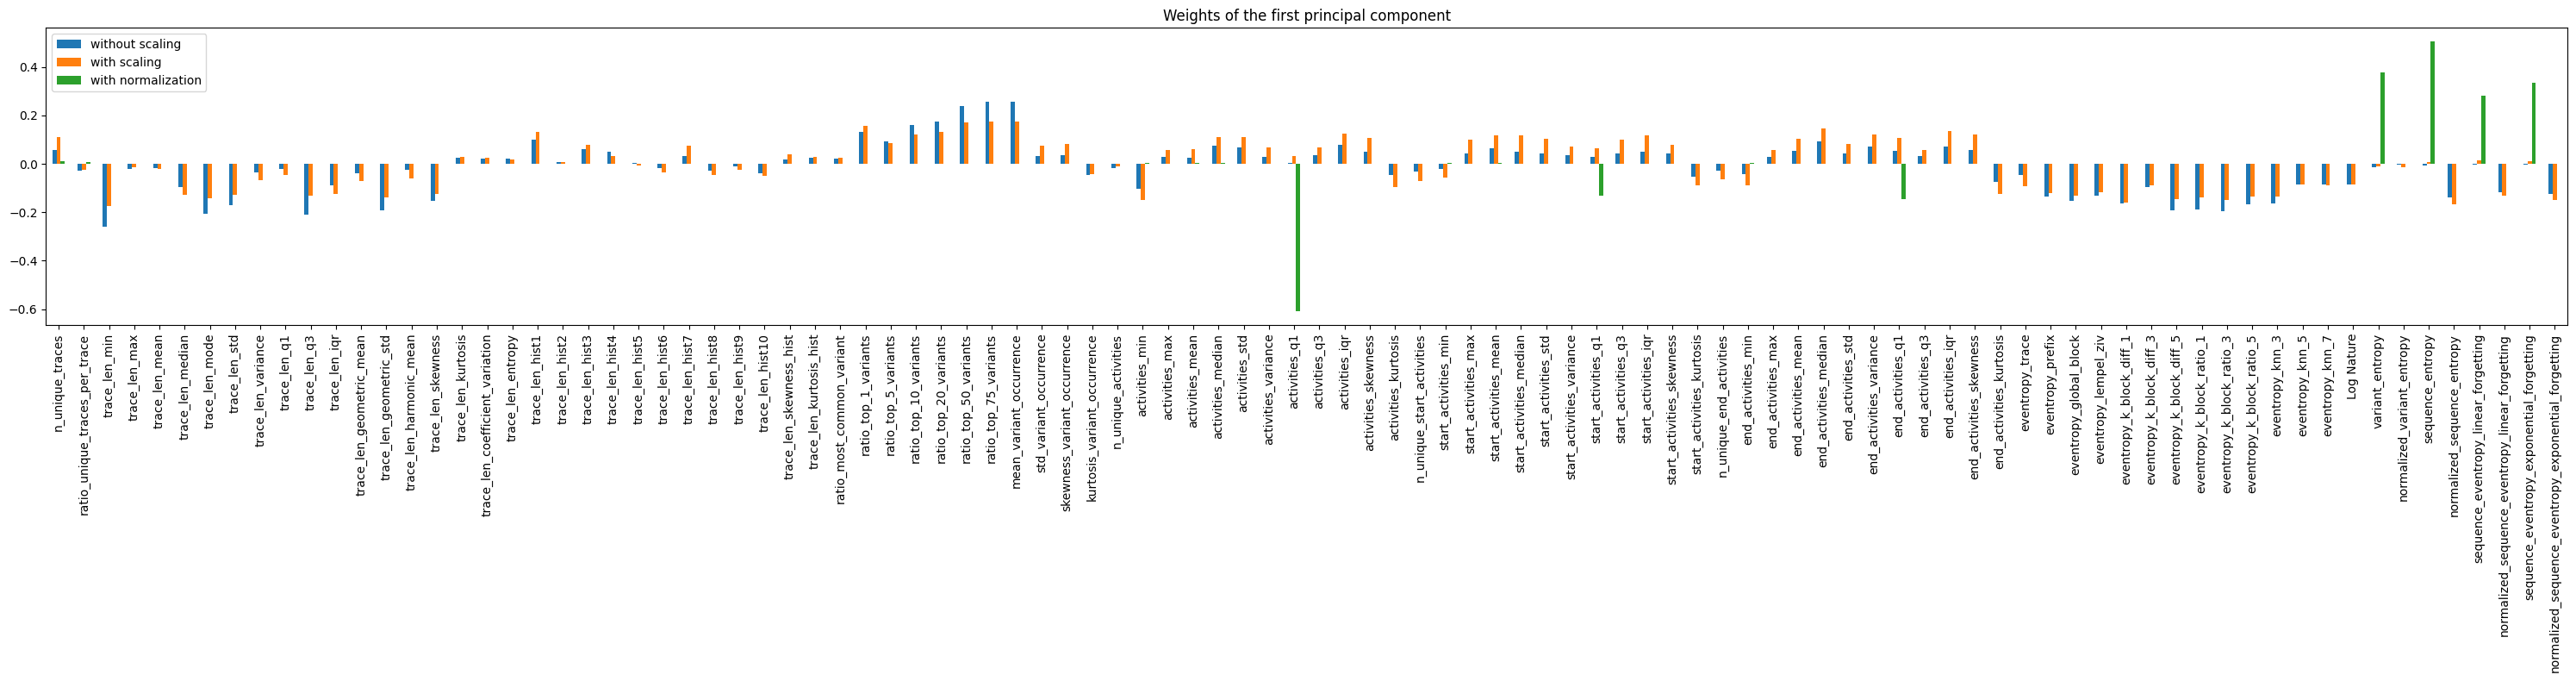

In [3]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = imp_df
scaler = StandardScaler()
minmaxscaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X)
normed_X = Normalizer(norm="l2").fit_transform(X)
minmaxscaled_X = minmaxscaler.fit_transform(X)


import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(minmaxscaled_X)
minmax_pca =  PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
norm_pca = PCA(n_components=2).fit(normed_X)


X_train_transformed = pca.transform(X)
X_train_minmax_transformed = pca.transform(minmaxscaled_X)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)
X_train_norm_transformed = norm_pca.transform(normed_X)


first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component["with normalization"] = norm_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(30, 8)
)

_ = plt.tight_layout()

In [4]:
weights = scaled_pca.components_[0]
series = pd.Series(weights, index=X.columns)
pca_weights = pd.DataFrame([series]).T
pca_weights.columns = ['weight']

pca_weights['abs_weight'] = pca_weights.apply(lambda x: abs(x['weight']), axis=1)
ranked_features = pca_weights.sort_values('abs_weight', ascending = False).index
print(ranked_features.shape)

for i in range(10,176,10):
    print(f"{i}: {list(ranked_features[:i])}")
    
list(ranked_features[:20])

(100,)
10: ['trace_len_min', 'mean_variant_occurrence', 'ratio_top_75_variants', 'ratio_top_50_variants', 'normalized_sequence_entropy', 'eventropy_k_block_diff_1', 'ratio_top_1_variants', 'normalized_sequence_eventropy_exponential_forgetting', 'eventropy_k_block_ratio_3', 'activities_min']
20: ['trace_len_min', 'mean_variant_occurrence', 'ratio_top_75_variants', 'ratio_top_50_variants', 'normalized_sequence_entropy', 'eventropy_k_block_diff_1', 'ratio_top_1_variants', 'normalized_sequence_eventropy_exponential_forgetting', 'eventropy_k_block_ratio_3', 'activities_min', 'end_activities_median', 'eventropy_k_block_diff_5', 'trace_len_mode', 'trace_len_geometric_std', 'eventropy_k_block_ratio_1', 'eventropy_k_block_ratio_5', 'end_activities_iqr', 'eventropy_knn_3', 'ratio_top_20_variants', 'normalized_sequence_eventropy_linear_forgetting']
30: ['trace_len_min', 'mean_variant_occurrence', 'ratio_top_75_variants', 'ratio_top_50_variants', 'normalized_sequence_entropy', 'eventropy_k_block_d

['trace_len_min',
 'mean_variant_occurrence',
 'ratio_top_75_variants',
 'ratio_top_50_variants',
 'normalized_sequence_entropy',
 'eventropy_k_block_diff_1',
 'ratio_top_1_variants',
 'normalized_sequence_eventropy_exponential_forgetting',
 'eventropy_k_block_ratio_3',
 'activities_min',
 'end_activities_median',
 'eventropy_k_block_diff_5',
 'trace_len_mode',
 'trace_len_geometric_std',
 'eventropy_k_block_ratio_1',
 'eventropy_k_block_ratio_5',
 'end_activities_iqr',
 'eventropy_knn_3',
 'ratio_top_20_variants',
 'normalized_sequence_eventropy_linear_forgetting']

In [5]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

scaled_dmf = scaleColumns(ft_preselection, ft_preselection.drop(cols_to_drop, axis=1).columns)
stats = ft_preselection.describe().transpose()
#stats = scaled_dmf.describe().transpose()

#print(stats.index)
stats

/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_21410/2487822438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_21410/2487822438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_21410/2487822438.

/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_21410/2487822438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])


,count,mean,std,min,25%,50%,75%,max
n_traces,34.0,0.097870,0.213476,0.0,0.003322,0.012379,0.069331,1.0
n_unique_traces,34.0,0.122521,0.249317,0.0,0.006388,0.029981,0.045631,1.0
ratio_unique_traces_per_trace,34.0,0.466611,0.415471,0.0,0.057282,0.386407,0.956895,1.0
trace_len_min,34.0,0.075448,0.181112,0.0,0.000000,0.000000,0.086957,1.0
trace_len_max,34.0,0.091313,0.202147,0.0,0.007823,0.033479,0.049630,1.0
...,...,...,...,...,...,...,...,...
normalized_sequence_entropy,31.0,0.571459,0.259735,0.0,0.388629,0.610429,0.792636,1.0
sequence_eventropy_linear_forgetting,31.0,0.068522,0.200469,0.0,0.002505,0.009557,0.017976,1.0
normalized_sequence_eventropy_linear_forgetting,31.0,0.579532,0.279733,0.0,0.332892,0.635997,0.804794,1.0
sequence_eventropy_exponential_forgetting,31.0,0.069387,0.198277,0.0,0.002883,0.010980,0.017668,1.0


36

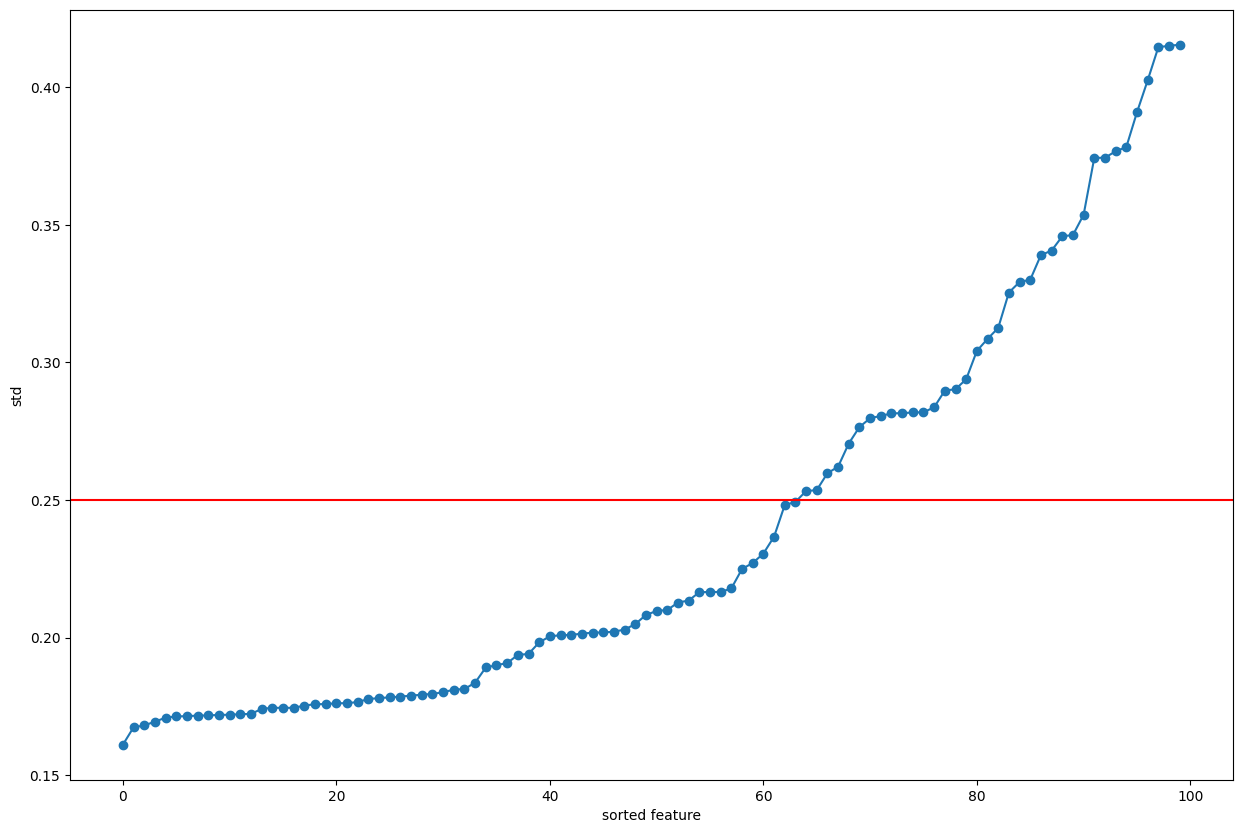

In [6]:
THRESHOLD= 0.25
stats['var'] = stats.apply(lambda x: x['std']**2, axis=1)
sorted_features = stats.sort_values("var", ascending=True)

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel("sorted feature")
plt.ylabel("std")
#plt.xticks(sorted_features.index)

plt.plot(range(len(sorted_features)), sorted_features['std'], marker='o')
plt.axhline(y=0.25, color='r', linestyle='-')

filtered_feat = sorted_features[sorted_features['std']>=THRESHOLD].index
len(filtered_feat)

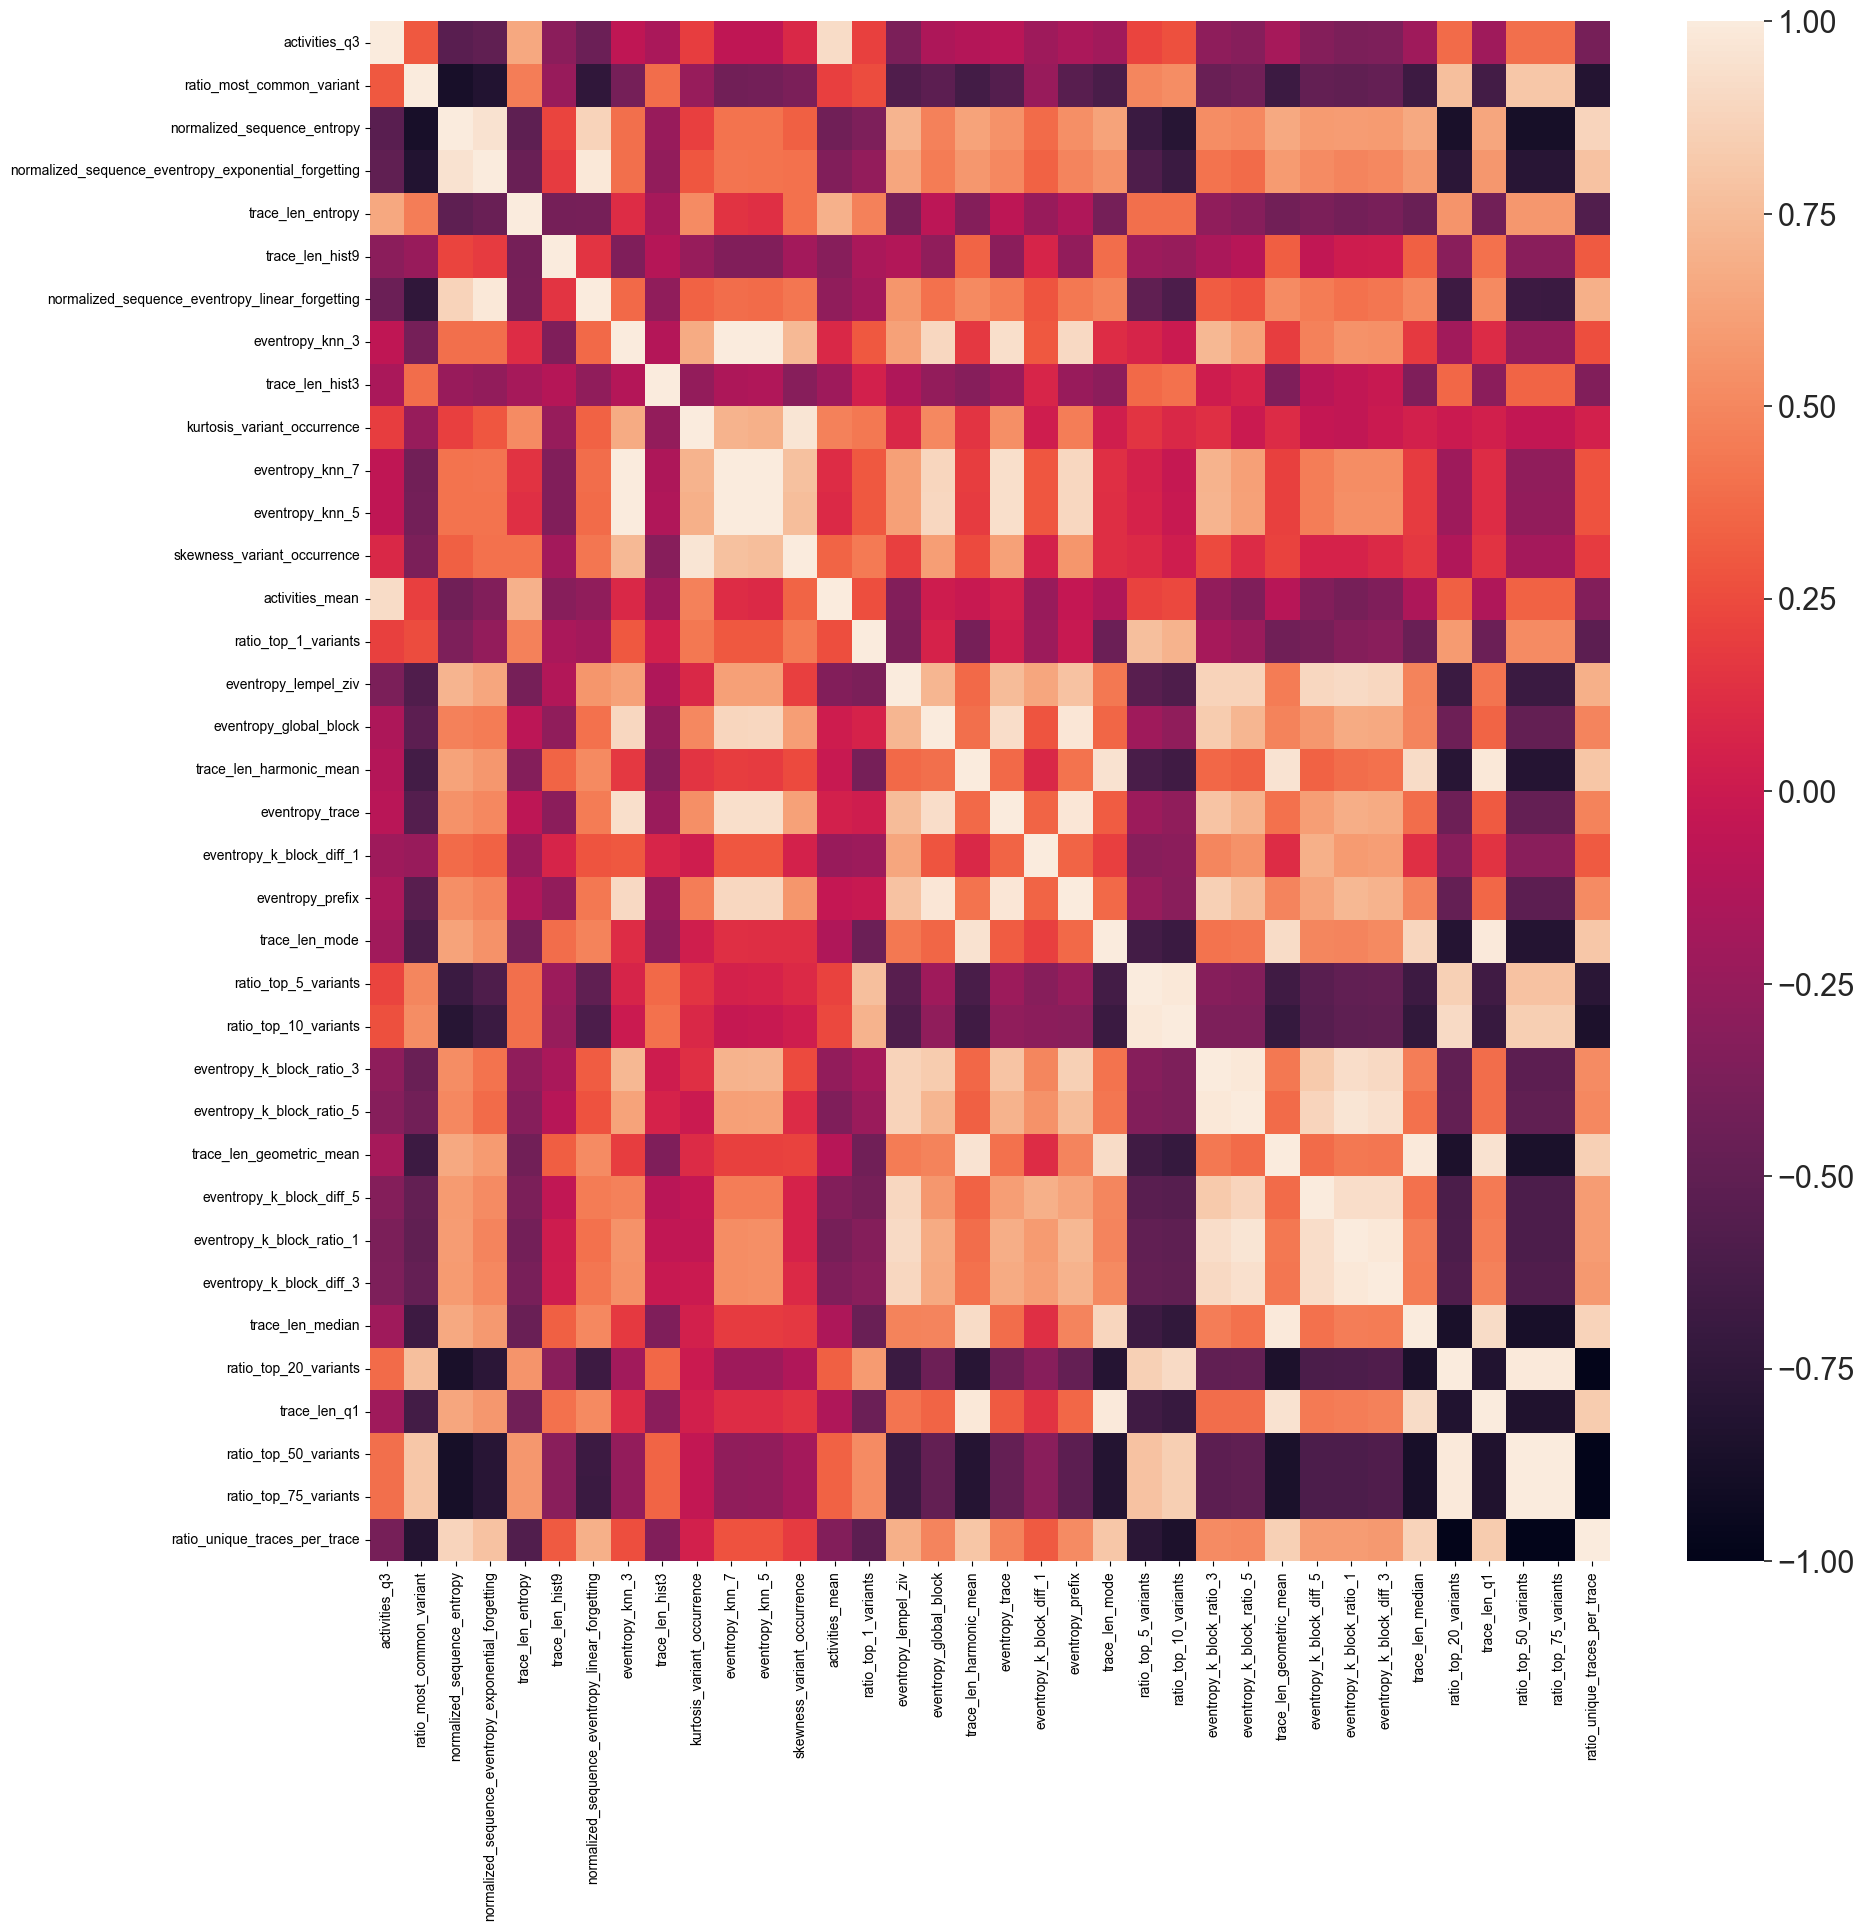

,activities_q3,ratio_most_common_variant,normalized_sequence_entropy,normalized_sequence_eventropy_exponential_forgetting,trace_len_entropy,trace_len_hist9,normalized_sequence_eventropy_linear_forgetting,eventropy_knn_3,trace_len_hist3,kurtosis_variant_occurrence,...,trace_len_geometric_mean,eventropy_k_block_diff_5,eventropy_k_block_ratio_1,eventropy_k_block_diff_3,trace_len_median,ratio_top_20_variants,trace_len_q1,ratio_top_50_variants,ratio_top_75_variants,ratio_unique_traces_per_trace
activities_q3,1.000000,0.299914,-0.535848,-0.500003,0.651857,-0.298666,-0.446838,-0.062271,-0.163765,0.192853,...,-0.178143,-0.331395,-0.372845,-0.360271,-0.204937,0.379360,-0.207547,0.392501,0.393849,-0.394220
ratio_most_common_variant,0.299914,1.000000,-0.872166,-0.820146,0.455871,-0.239070,-0.744763,-0.399730,0.387022,-0.248842,...,-0.680095,-0.484408,-0.505069,-0.484158,-0.677083,0.772018,-0.640762,0.809234,0.808176,-0.808280
normalized_sequence_entropy,-0.535848,-0.872166,1.000000,0.949180,-0.513211,0.220806,0.867450,0.391840,-0.235271,0.196209,...,0.664062,0.591652,0.595375,0.587182,0.659965,-0.866084,0.647014,-0.876646,-0.877751,0.878053
normalized_sequence_eventropy_exponential_forgetting,-0.500003,-0.820146,0.949180,1.000000,-0.453465,0.184055,0.979552,0.393510,-0.273272,0.295912,...,0.592721,0.519657,0.491600,0.504442,0.578747,-0.770970,0.577783,-0.784374,-0.785651,0.786009
trace_len_entropy,0.651857,0.455871,-0.513211,-0.453465,1.000000,-0.401086,-0.392114,0.115983,-0.177211,0.518292,...,-0.421136,-0.374418,-0.411303,-0.389937,-0.459727,0.556509,-0.414980,0.573152,0.573851,-0.573412
trace_len_hist9,-0.298666,-0.239070,0.220806,0.184055,-0.401086,1.000000,0.152934,-0.357692,-0.104087,-0.248786,...,0.327961,-0.047815,0.009878,0.016813,0.331725,-0.306775,0.406222,-0.308349,-0.309056,0.309232
normalized_sequence_eventropy_linear_forgetting,-0.446838,-0.744763,0.867450,0.979552,-0.392114,0.152934,1.000000,0.367694,-0.276891,0.341992,...,0.522601,0.445527,0.400941,0.426984,0.500775,-0.672905,0.511506,-0.686745,-0.688042,0.688380
eventropy_knn_3,-0.062271,-0.399730,0.391840,0.393510,0.115983,-0.357692,0.367694,1.000000,-0.114732,0.670754,...,0.194343,0.470102,0.548088,0.544745,0.176249,-0.200954,0.103769,-0.260643,-0.262890,0.264034
trace_len_hist3,-0.163765,0.387022,-0.235271,-0.273272,-0.177211,-0.104087,-0.276891,-0.114732,1.000000,-0.258008,...,-0.352139,-0.089258,-0.051290,-0.017674,-0.352342,0.365283,-0.300585,0.350999,0.349343,-0.349657
kurtosis_variant_occurrence,0.192853,-0.248842,0.196209,0.295912,0.518292,-0.248786,0.341992,0.670754,-0.258008,1.000000,...,0.103149,-0.033833,-0.054358,-0.001832,0.042782,-0.003638,0.037692,-0.042264,-0.043031,0.044279


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns



selected_per_category_highest_variance = ['ratio_unique_traces_per_trace', # simple_statistics
                                         'trace_len_hist8',# trace_length
                                         'skewness_variant_occurrence',# trace_variant
                                         'activities_mean',# activities
                                         'start_activities_kurtosis',# start_activities
                                         'end_activities_median',# end_activities
                                         'entropy_k_block_diff_1',# entropies
                                         'n_traces', 'n_unique_traces'
                                         ]
def plot_miner_correlation(input_df):
    #df = input_df.loc[:, input_df.columns.isin(selected_per_category_highest_variance)]
    df = input_df.loc[:,:]
    #df = input_df.loc[:, sorted_features]
    #df = input_df.loc[:, input_df.columns[3:]]

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20,20)) 
    sns.set(font_scale = 2)
    b= sns.heatmap(corr,
                ax=ax,
                vmin=-1,
                vmax=1,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    #b.set_yticklabels(b.get_yticks(), size = 15)
    plt.show()
    return corr

#scaled_dmf = scaled_dmf.drop(['log', 'Log Nature'], axis=1)
scaled_dmf = scaled_dmf[filtered_feat]
corr_df = plot_miner_correlation(scaled_dmf)
stats = stats.loc[filtered_feat]
corr_df

<AxesSubplot: xlabel='disconnection', ylabel='std'>

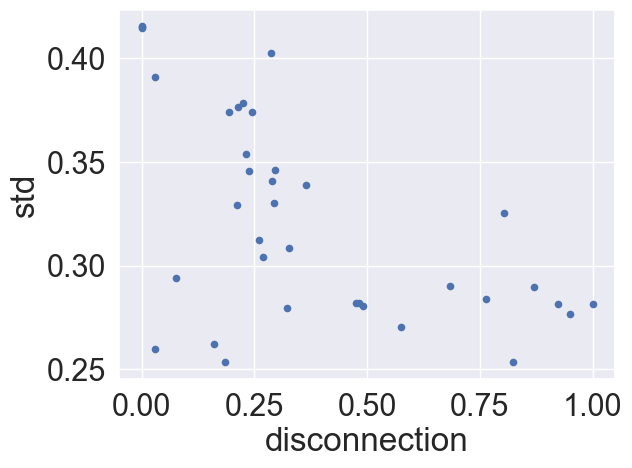

In [8]:
#feature_metrics= corr_df.loc[:,:]
feature_metrics = pd.DataFrame()
feature_metrics['disconnection'] = pd.Series(min_max_scaler.fit_transform((corr_df.abs()).sum(axis=1).to_numpy().reshape(-1, 1)).reshape(len(corr_df))).apply(lambda x: 1-x)   
#TODO: MinMaxScaler ONLY before std computation
#feature_metrics['std'] = pd.Series(min_max_scaler.fit_transform(stats['std'].to_numpy().reshape(-1, 1)).reshape(len(corr_df)))
feature_metrics['std'] = pd.Series(stats['std'].to_numpy().reshape(-1, 1).reshape(len(corr_df)))
#feature_metrics['score'] = feature_metrics.apply(lambda x: x['disconnection'], axis=1) #TODO mean or prod?
feature_metrics['score'] = feature_metrics.apply(lambda x: x.prod(), axis=1) #TODO mean or prod?
feature_metrics.index = corr_df.index
#pd.concat([feature_metrics, stats['std']], axis=1)
#feature_metrics = scaleColumns(feature_metrics, feature_metrics.columns)


feature_metrics.plot.scatter(x="disconnection", y="std")

#top_k_score = feature_metrics.sort_values(["score"], ascending=False).head(TOP_K).index[:5].tolist()
#other = ['variant_entropy', 'normalized_variant_entropy', 'sequence_entropy', 'normalized_sequence_entropy','sequence_entropy_linear_forgetting','normalized_sequence_entropy_linear_forgetting','sequence_entropy_exponential_forgetting','normalized_sequence_entropy_exponential_forgetting'] 
#selected_highest_score = top_k_score+other

                                                    disconnection       std   
trace_len_hist3                                          1.000000  0.281492  \
trace_len_hist9                                          0.950974  0.276533   
eventropy_k_block_diff_1                                 0.803846  0.325423   
kurtosis_variant_occurrence                              0.923120  0.281577   
activities_mean                                          0.869433  0.289788   
skewness_variant_occurrence                              0.764267  0.283716   
activities_q3                                            0.824492  0.253252   
ratio_top_1_variants                                     0.683999  0.290271   
trace_len_entropy                                        0.576229  0.270546   
eventropy_knn_3                                          0.491725  0.280572   
eventropy_knn_5                                          0.481065  0.281888   
eventropy_knn_7                                     

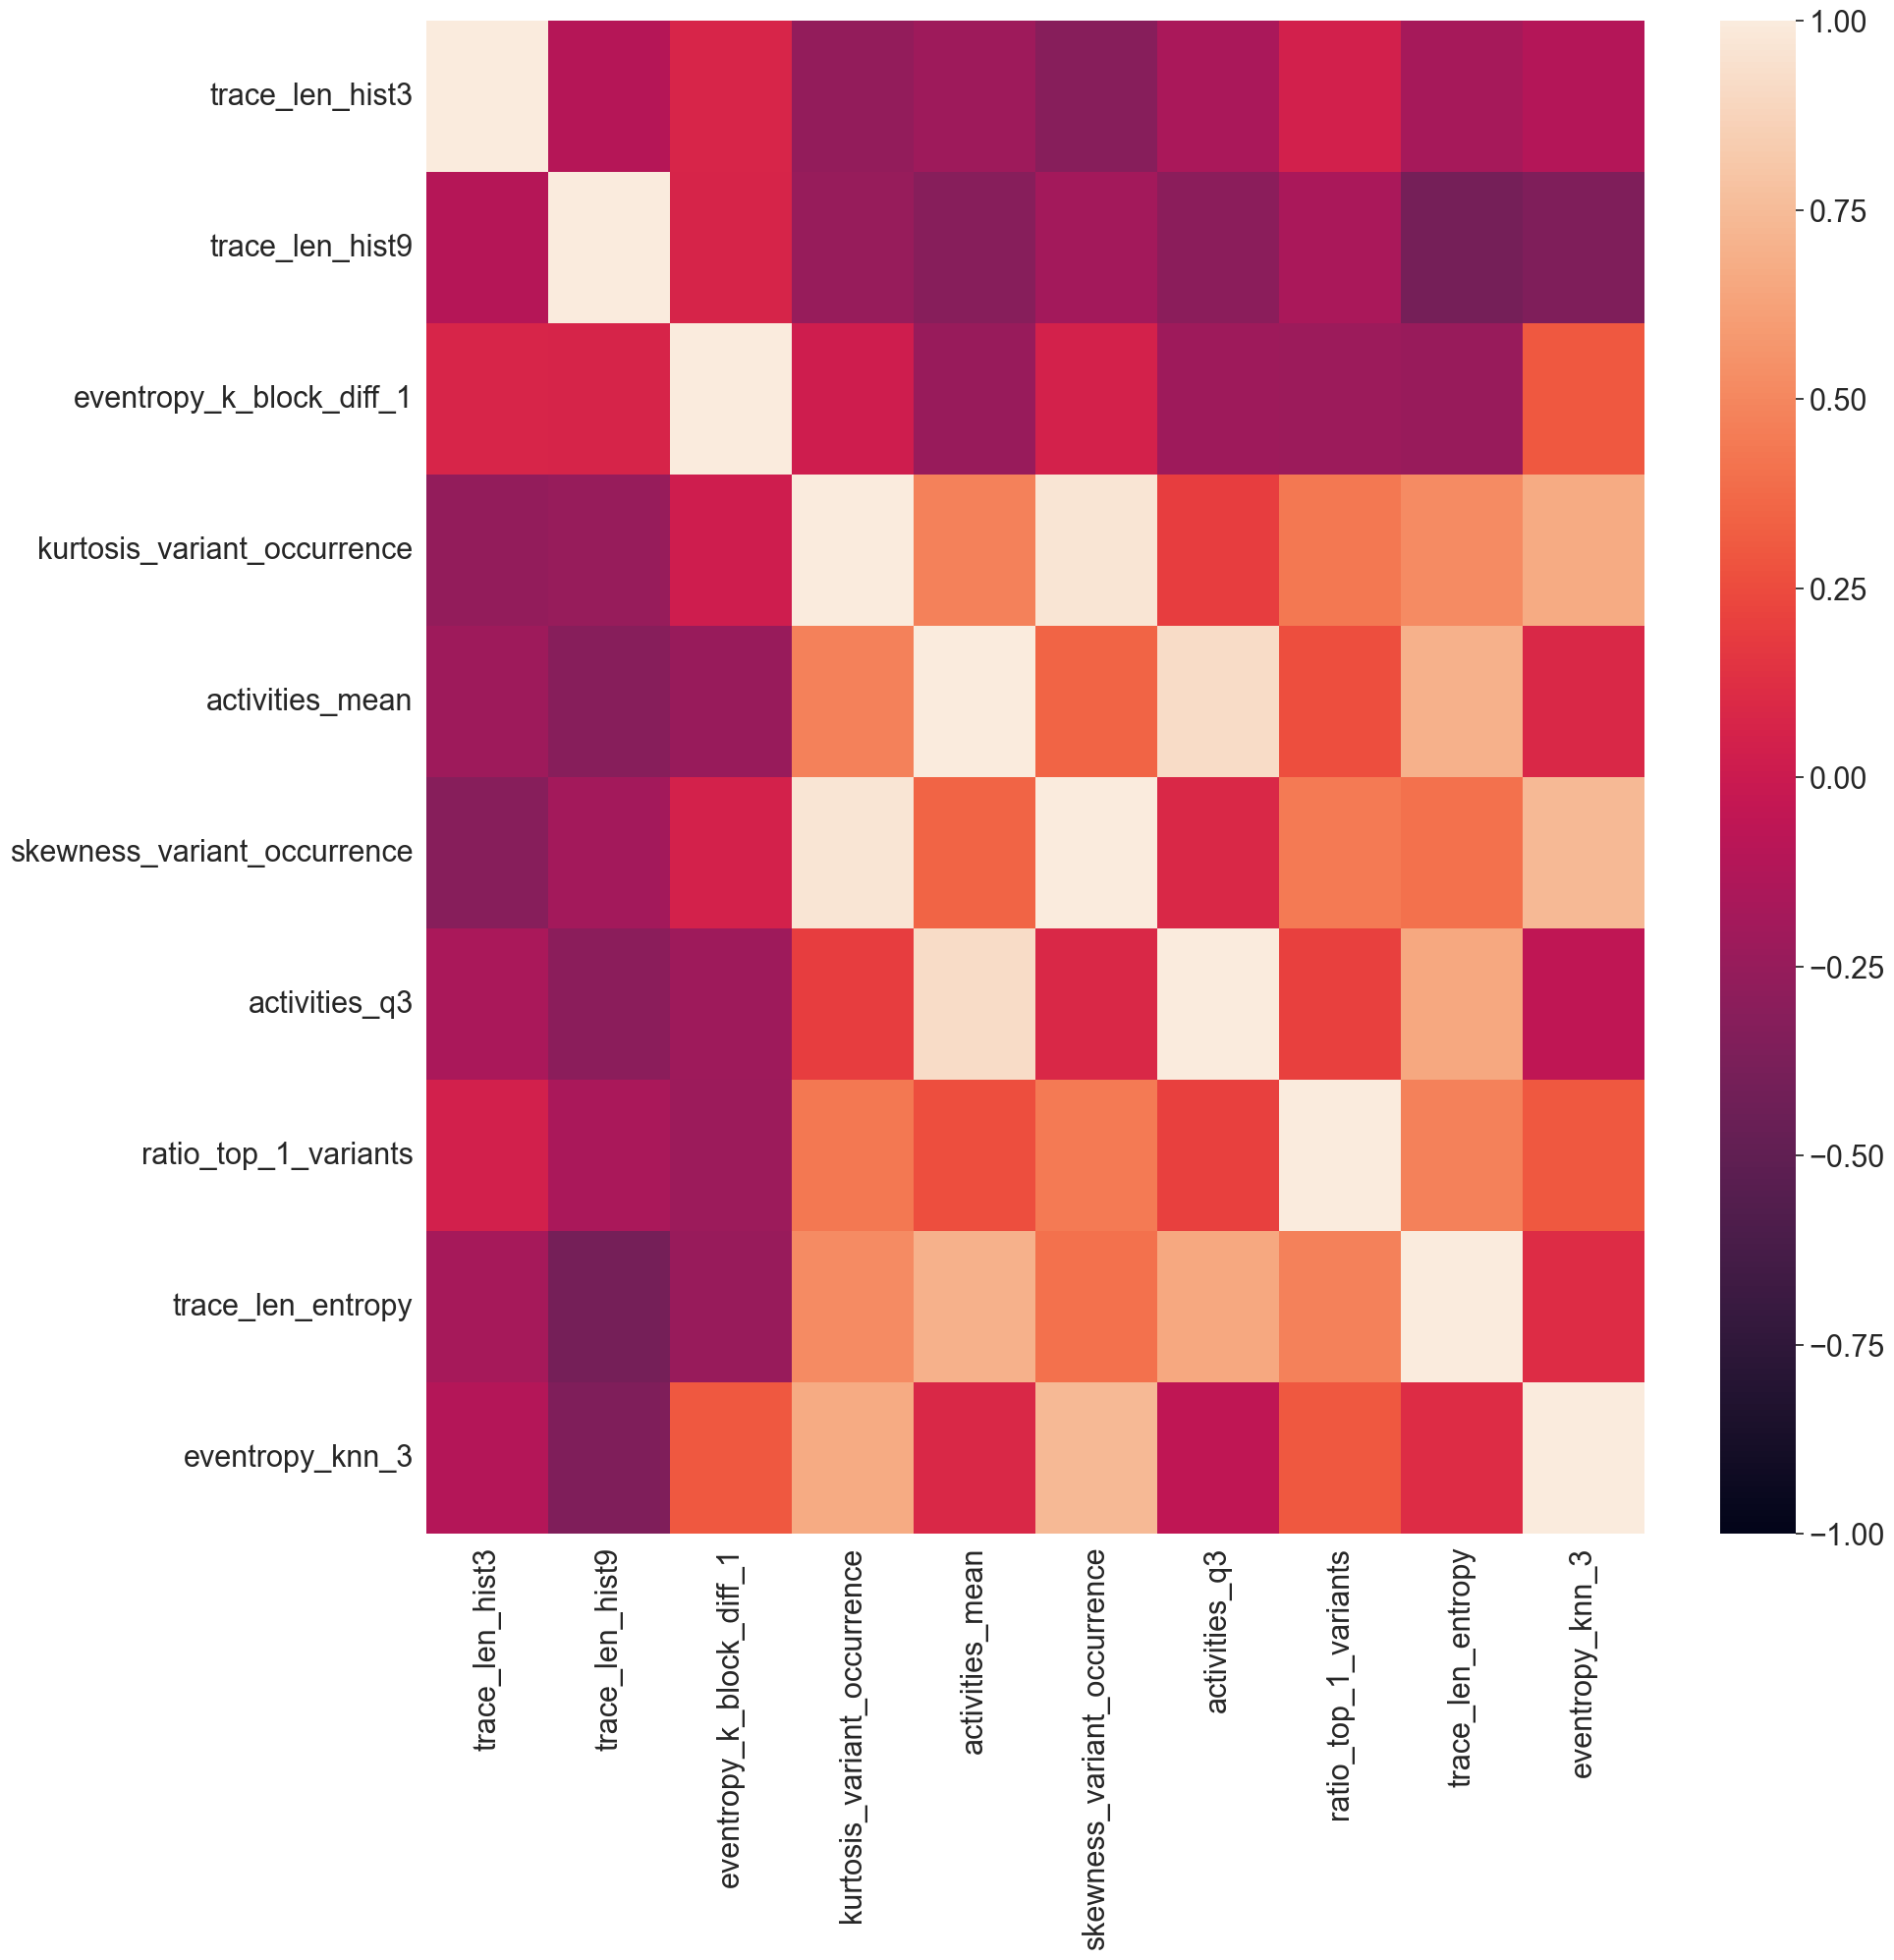

In [9]:
TOP_K = 10
selected_highest_score = feature_metrics.sort_values(["score"], ascending=False)
print(selected_highest_score)
selected_highest_score = selected_highest_score.head(TOP_K).index

feature_metrics.loc[selected_highest_score,:]
corr_sel_df = plot_miner_correlation(scaled_dmf[selected_highest_score])

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
df= dmf.loc[:,dmf.columns.isin(selected_highest_score)]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)
imp_df = imp_mean.transform(df)
imp_df = pd.DataFrame(imp_df, columns = df.columns)
print("Before:", len(df.loc[:, df.isna().any()].columns), "columns in", len(df.loc[:, df.isna().any()]), 'rows')
print("After:", len(imp_df.loc[:, imp_df.isna().any()].columns))

Before: 0 columns in 34 rows
After: 0


/Users/andreamaldonado/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


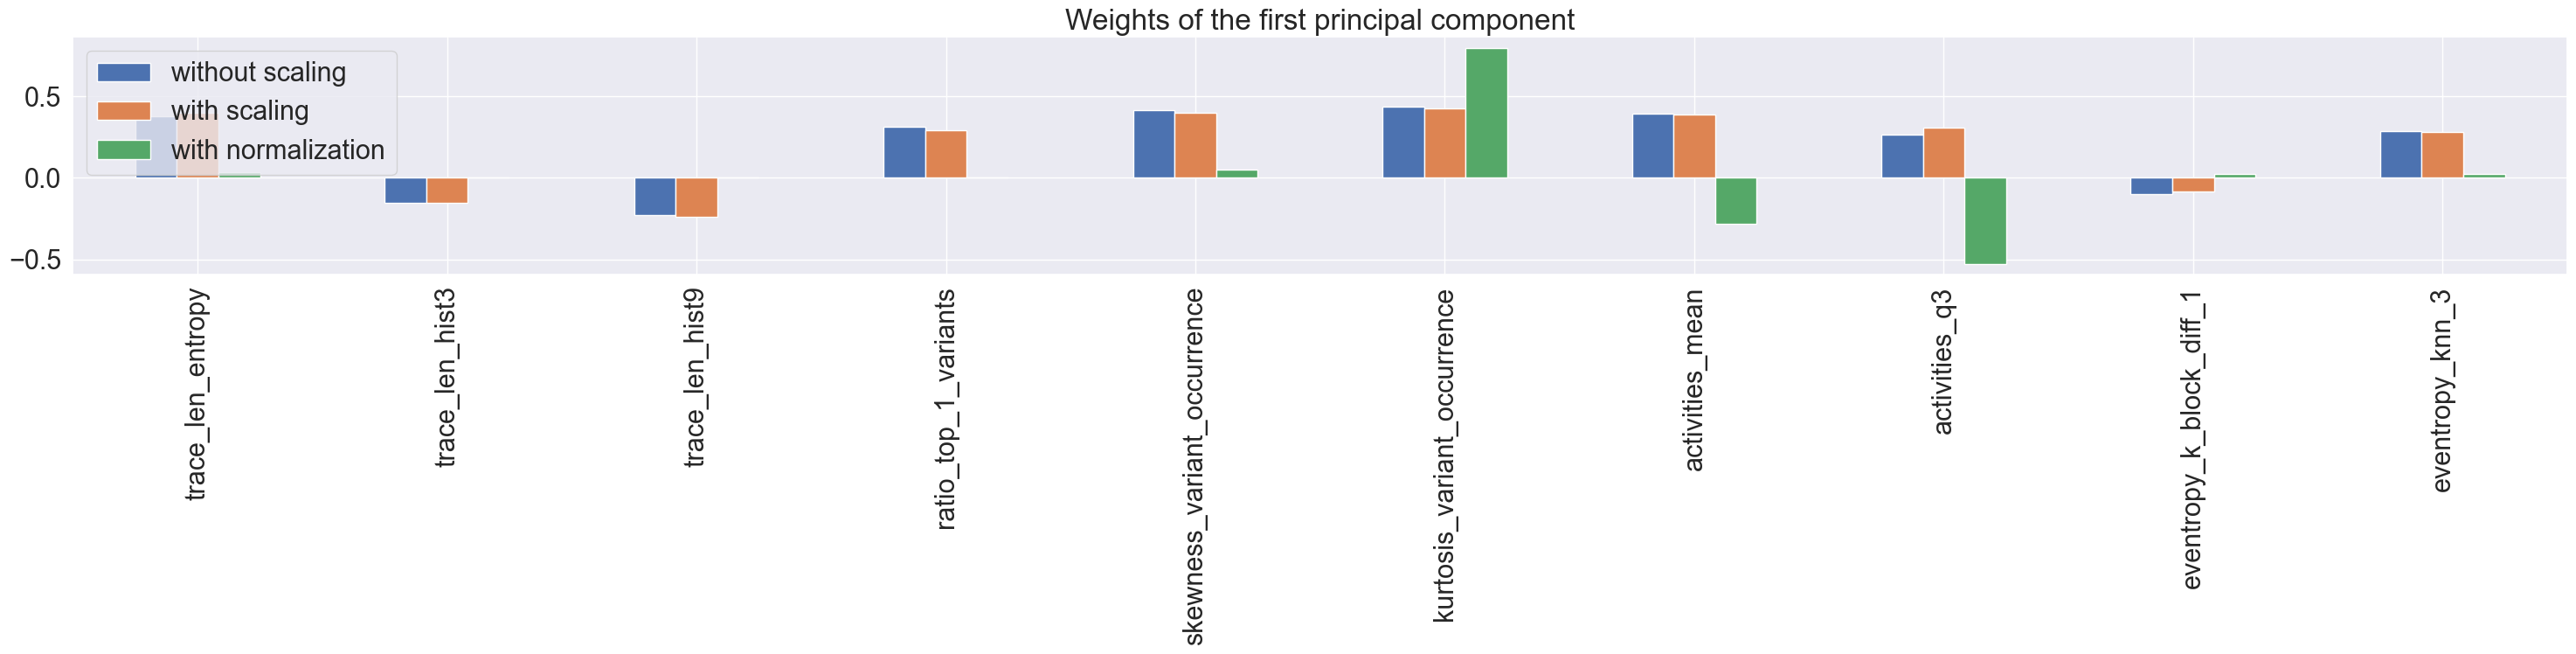

In [11]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = imp_df
scaler = StandardScaler()
minmaxscaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X)
normed_X = Normalizer(norm="l2").fit_transform(X)
minmaxscaled_X = minmaxscaler.fit_transform(X)


import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(minmaxscaled_X)
minmax_pca =  PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
norm_pca = PCA(n_components=2).fit(normed_X)


X_train_transformed = pca.transform(X)
X_train_minmax_transformed = pca.transform(minmaxscaled_X)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)
X_train_norm_transformed = norm_pca.transform(normed_X)


first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component["with normalization"] = norm_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(30, 8)
)

_ = plt.tight_layout()



In [12]:
weights = pca.components_[0]#*np.sqrt(pca.explained_variance_)
len(weights)

10

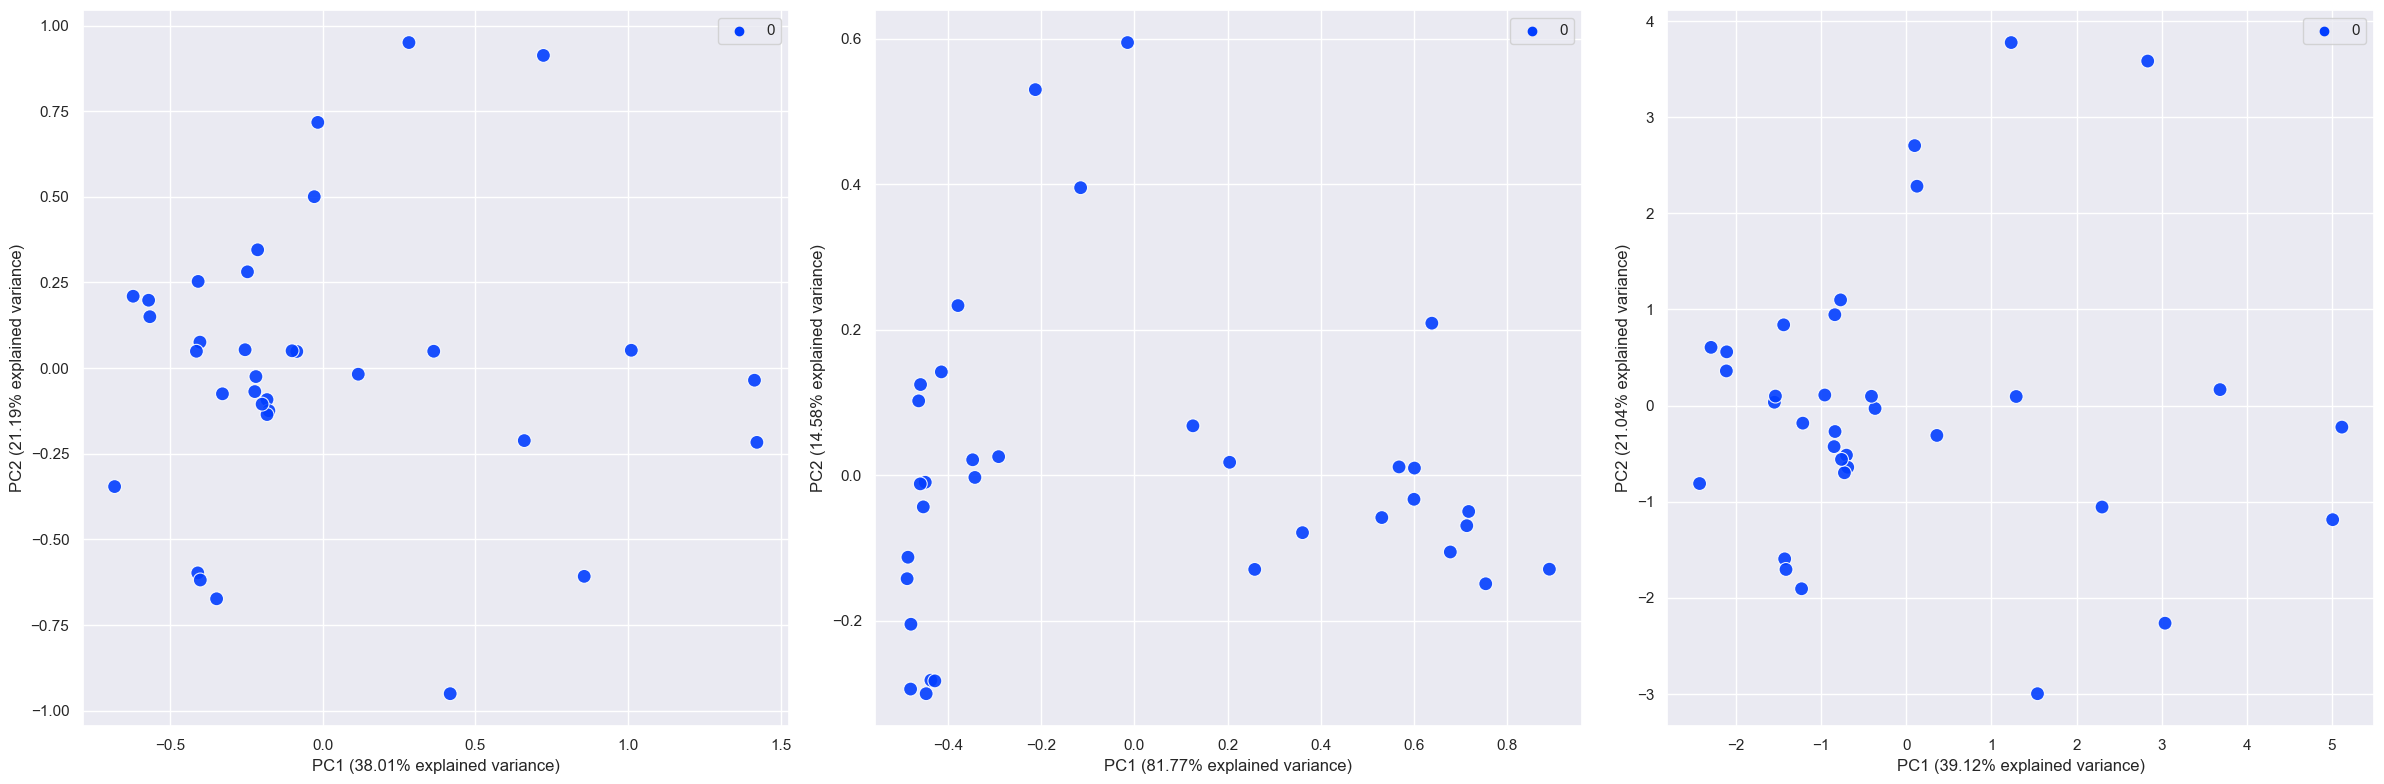

In [13]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)

# Normalizer: By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. 
    # Unit norm with L2 means that if each element were squared and summed, the total would equal 1. 
    #Normalizer does transform all the features to values between -1 and 1. 
#norm_data = Normalizer(norm="l2").fit_transform(df.drop(["log"], axis=1))
norm_data = Normalizer(norm="l2").fit_transform(X)

#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 
    #Unit variance means dividing all the values by the standard deviation.
scaler = StandardScaler()
sca_data = scaler.fit_transform(X)
#norm_data = Normalizer(norm="l2").fit_transform(norm_data)

sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24, 8))

#X_new = pca.fit_transform(X)
X_new = pca.fit_transform(minmaxscaled_X)
df_pca = pd.DataFrame(X_new, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax1, data=df_pca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax1.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax1.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_norm = pca.fit_transform(norm_data)
df_pca_norm = pd.DataFrame(X_new_norm, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax2, data=df_pca_norm, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax2.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax2.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_sca = pca.fit_transform(sca_data)
df_pca_sca = pd.DataFrame(X_new_sca, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax3, data=df_pca_sca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax3.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax3.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
plt.tight_layout()
# plt.show()
# plt.close()

#ratio number of activities and traces... 

0.936564226105012


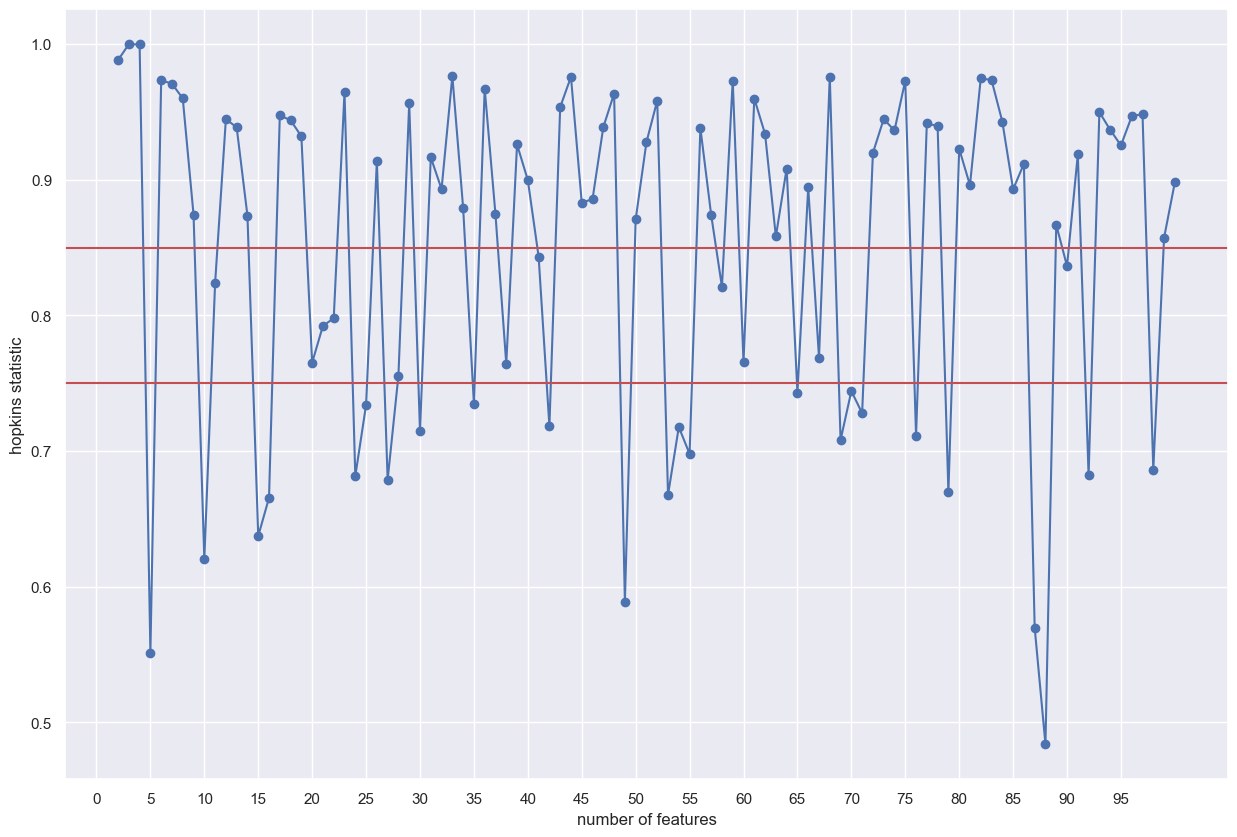

In [14]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
from numpy.random import uniform
from sklearn.impute import SimpleImputer

# Clustering tendencies
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    #X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

#https://github.com/prathmachowksey/Hopkins-Statistic-Clustering-Tendency
def hopkins_wrapper(dmf, k):
    selection = feature_metrics.sort_values(["score"], ascending=False).head(k).index
    selected_df= dmf.loc[:,dmf.columns.isin(selection)]

    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(selected_df)

    selected_df = imp_mean.transform(selected_df)

    selected_df = Normalizer(norm="l2").fit_transform(selected_df)
    return hopkins_statistic(selected_df)

print(hopkins_statistic(norm_data))

hopkins_stats = []
for k in range(99):
    hopkins_stats.append(hopkins_wrapper(dmf, k+2))

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel("number of features")
plt.ylabel("hopkins statistic")
plt.xticks(np.arange(0, 100, 5))
#ax = plt.axes()

plt.plot(np.arange(2, 101),hopkins_stats, marker='o')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.axhline(y=0.85, color='r', linestyle='-')

plt.show()